## Water Quality - TF Classification

### About Dataset


#### Context

Access to safe drinking-water is essential to health, basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national regional, and local. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since reduction in adverse health effects and health care costs outweigh the costs of undertaking interventions

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('water_potability.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
ph_null = df['ph'].isnull().sum()

In [9]:
sulfate_null = df['Sulfate'].isnull().sum()

In [10]:
ph_null/3275*100

14.99236641221374

In [11]:
sulfate_null/3275*100 # don't want to lose 24% of my dataset, let's replace nulls in sulfate with the mean of sulfate. Same for ph

23.84732824427481

In [12]:
mean_sulfate = df['Sulfate'].mean()
df['Sulfate'].fillna(mean_sulfate, inplace=True)

In [13]:
mean_ph = df['ph'].mean()
df['ph'].fillna(mean_ph, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
Trihalomethanes_null = df['Trihalomethanes'].isnull().sum()
Trihalomethanes_null/3276*100

4.945054945054945

We can afford to lose the nulls in this column, so we will drop them

In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3114 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3114 non-null   float64
 1   Hardness         3114 non-null   float64
 2   Solids           3114 non-null   float64
 3   Chloramines      3114 non-null   float64
 4   Sulfate          3114 non-null   float64
 5   Conductivity     3114 non-null   float64
 6   Organic_carbon   3114 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3114 non-null   float64
 9   Potability       3114 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 267.6 KB


<Axes: >

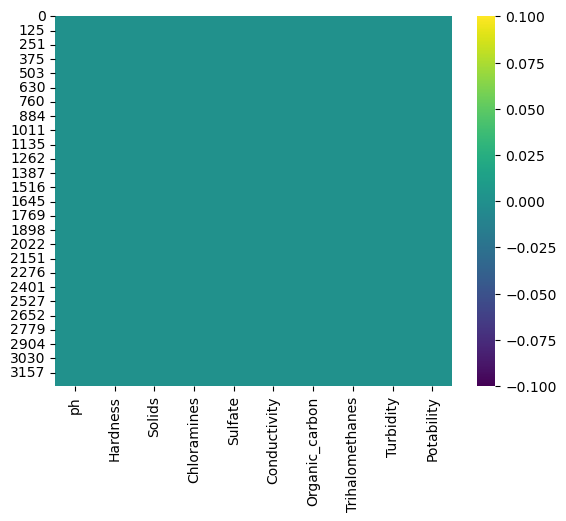

In [19]:
sns.heatmap(data=df.isnull(), annot=False, xticklabels=True, cmap='viridis')

In [20]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [21]:
df.Potability.value_counts()

Potability
0    1891
1    1223
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

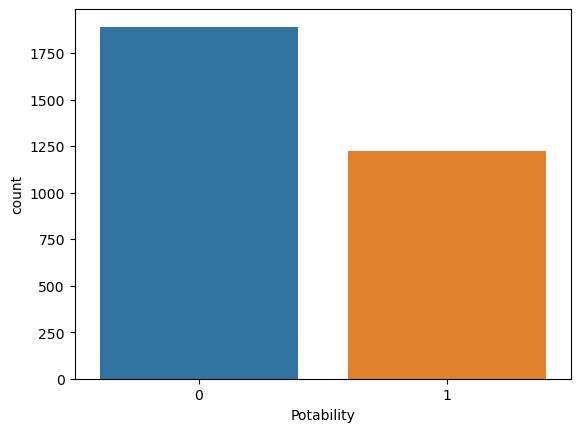

In [22]:
sns.countplot(data=df, x='Potability')

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ph', ylabel='Count'>

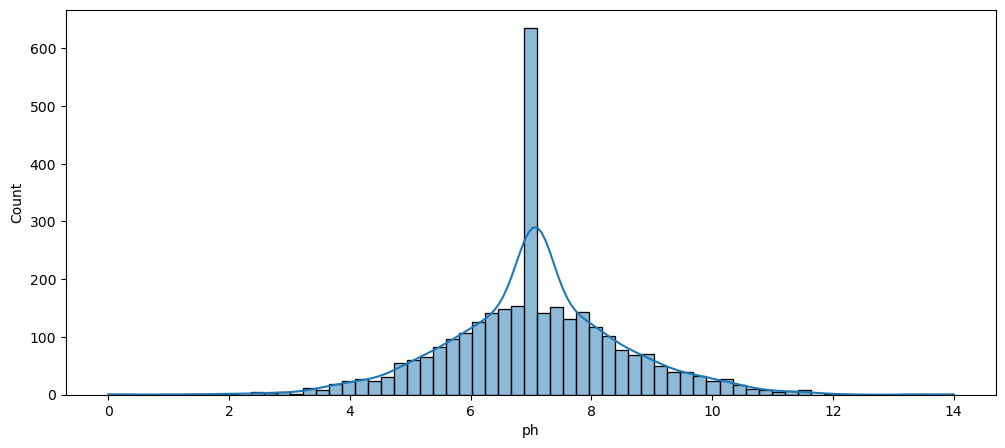

In [23]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='ph', kde=True)

<Axes: >

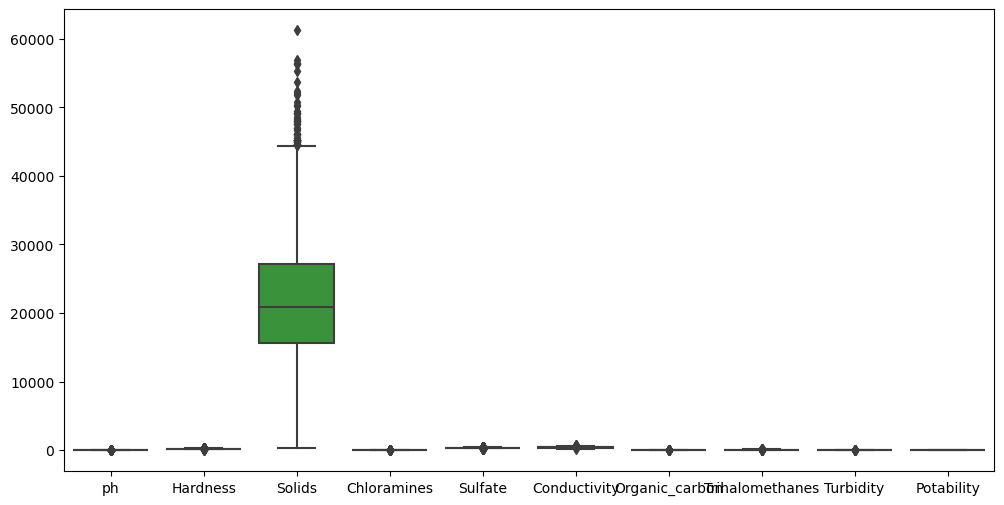

In [24]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Solids', ylabel='Count'>

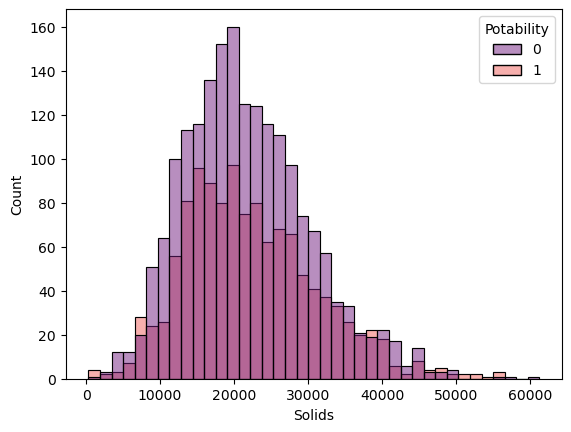

In [25]:
sns.histplot(data=df, x='Solids', hue='Potability', palette='magma')

<Axes: >

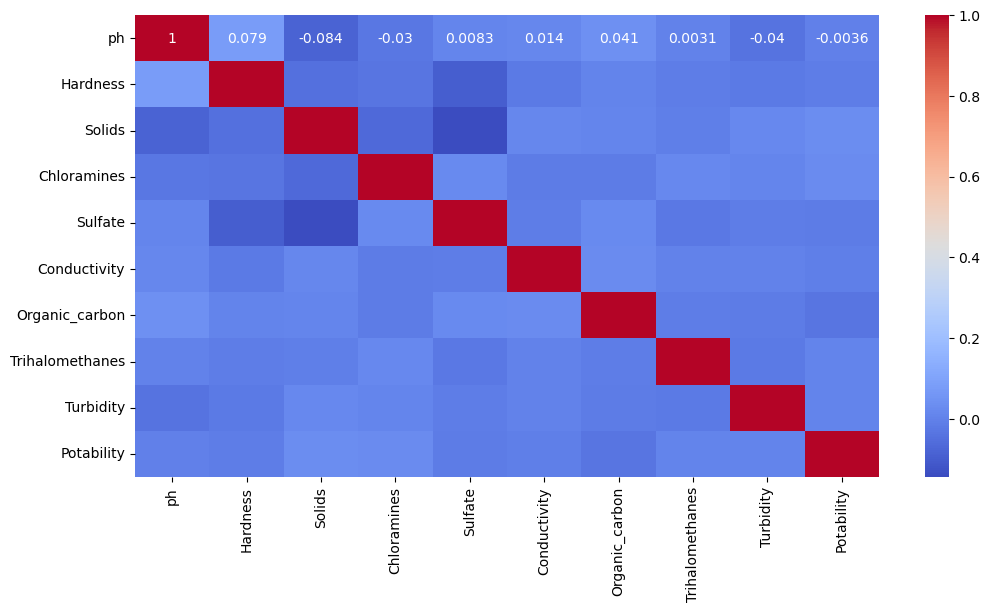

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True, xticklabels=True)

In [27]:
df['Solids'].describe()

count     3114.000000
mean     21965.123666
std       8729.800382
min        320.942611
25%      15682.104813
50%      20890.593528
75%      27198.150053
max      61227.196008
Name: Solids, dtype: float64

In [28]:
# Outlier removal
Q1 = df['Solids'].quantile(0.25)
Q3 = df['Solids'].quantile(0.75)
IQR = Q3-Q1
df_filtered = df[(df['Solids'] > Q1 - 1.5 * IQR) & (df['Solids'] < Q3 + 1.5*IQR)]

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Solids', ylabel='Count'>

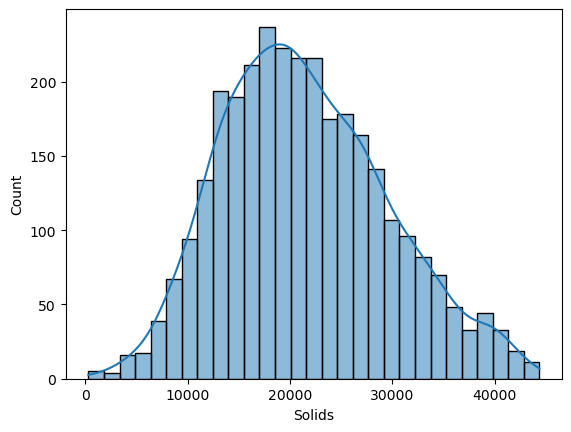

In [29]:
sns.histplot(data=df_filtered, x='Solids', kde=True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df_filtered.drop('Potability', axis=1)
y = df_filtered['Potability'].values

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_test = scaler.transform(X_test)

In [37]:
X_train.shape

(2451, 9)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-06-02 23:55:44.385995: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 23:55:44.820534: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 23:55:46.129384: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 23:55:49.765436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [39]:
model = Sequential()

In [40]:
model.add(Dense(9, activation='relu'))
model.add(Dense(4, activation='relu'))

# Binary classification problem, hence activation function is sigmoid
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7294 - val_loss: 0.6862
Epoch 2/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6803 - val_loss: 0.6755
Epoch 3/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6736 - val_loss: 0.6717
Epoch 4/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6719 - val_loss: 0.6699
Epoch 5/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6701 - val_loss: 0.6693
Epoch 6/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6687 - val_loss: 0.6690
Epoch 7/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6675 - val_loss: 0.6688
Epoch 8/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6678 - val_loss: 0.6687
Epoch 9/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6658 - val_loss: 0.6685
Epoch 10/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6717 - val_loss: 0.6683
Epoch 11/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6652 - val_loss: 0.6687
Epoch 12/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6

In [42]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

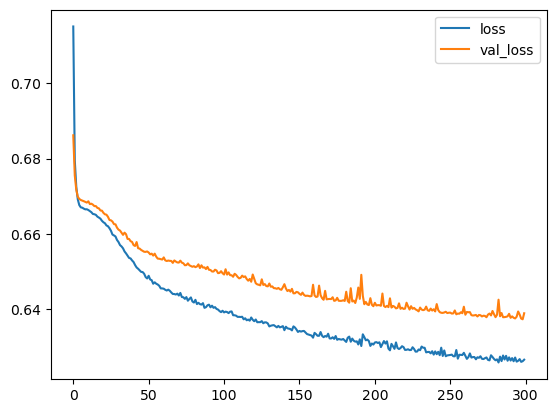

In [43]:
model_loss.plot()

## Implement early stopping

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))

# Binary classification problem, hence activation function is sigmoid
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=25)

In [48]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7040 - val_loss: 0.6855
Epoch 2/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6840 - val_loss: 0.6811
Epoch 3/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6779 - val_loss: 0.6772
Epoch 4/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6733 - val_loss: 0.6736
Epoch 5/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6733 - val_loss: 0.6708
Epoch 6/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6715 - val_loss: 0.6683
Epoch 7/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6590 - val_loss: 0.6667
Epoch 8/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6634 - val_loss: 0.6653
Epoch 9/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6648 - val_loss: 0.6630
Epoch 10/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6564 - val_loss: 0.6616
Epoch 11/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6617 - val_loss: 0.6618
Epoch 12/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6

<Axes: >

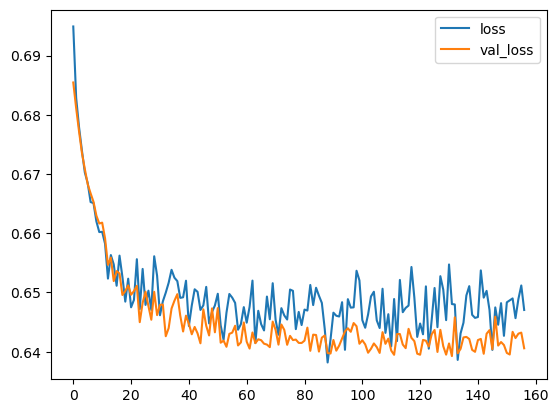

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [50]:
pred = model.predict(X_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [51]:
pred = np.where(pred > 0.5, 1,0)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77       371
           1       0.72      0.19      0.30       242

    accuracy                           0.65       613
   macro avg       0.68      0.57      0.53       613
weighted avg       0.67      0.65      0.58       613



[[353  18]
 [196  46]]
